In [10]:
import csv
import json

csvfile = open('data/monster_com-job.csv', 'r')
jsonfile = open('data/monster_com-job.json', 'w')

fieldnames = ("FirstName","LastName","IDNumber","Message")
reader = csv.DictReader( csvfile, fieldnames)
for row in reader:
    json.dump(row, jsonfile)
    jsonfile.write('\n')


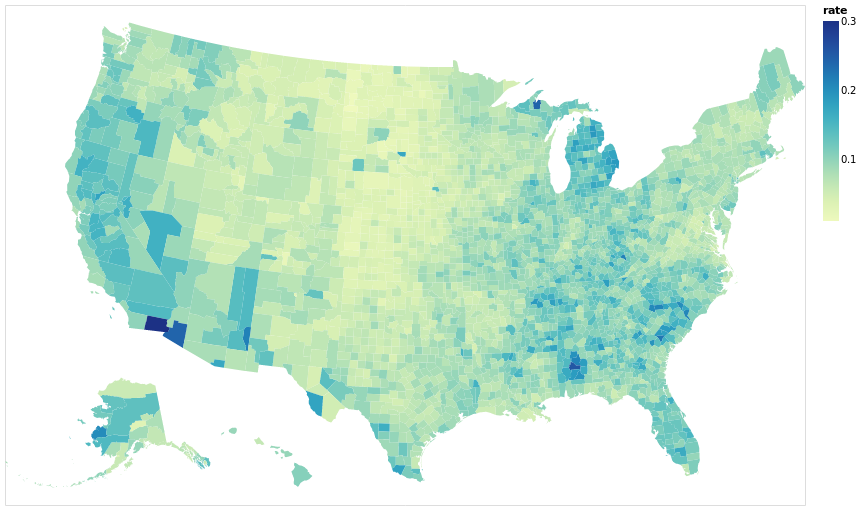

In [3]:
import altair as alt

alt.renderers.enable('notebook')

from vega_datasets import data

counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url

alt.Chart(counties).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=800,
    height=500
)

In [4]:
import branca
import pandas as pd

county_geo = f'/home/code/Desktop/test/data/us-10m.json'
df = pd.read_csv("/home/code/Desktop/test/data/monster_com-job.csv")

df


ModuleNotFoundError: No module named 'branca'

In [1]:
from vega_datasets import local_data
local_data.list_datasets()


['airports',
 'anscombe',
 'barley',
 'burtin',
 'cars',
 'crimea',
 'driving',
 'iowa-electricity',
 'iris',
 'la-riots',
 'seattle-temps',
 'seattle-weather',
 'sf-temps',
 'stocks',
 'us-employment',
 'wheat']

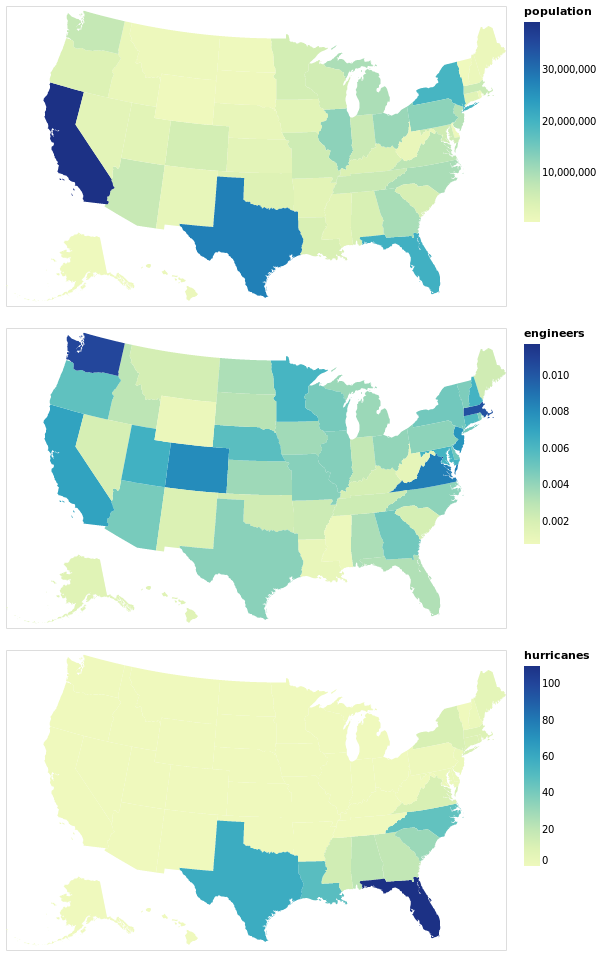

In [5]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
source = data.population_engineers_hurricanes.url
variable_list = ['population', 'engineers', 'hurricanes']

alt.Chart(states).mark_geoshape().encode(
    alt.Color(alt.repeat('row'), type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', variable_list)
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
).repeat(
    row=variable_list
).resolve_scale(
    color='independent'
)